In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from scipy.special import inv_boxcox
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [2]:
os.chdir("/Users/shenchingfeng/GitHub/ML-Forest-Fire-Prediction-with-Regression-and-Classification")

In [9]:
f = 'data/transformed_df_n0.csv'
df = pd.read_csv(f)

## Original Data

Workflow:

1. `pd.get_dummies` for Categorical data (X, Y, month, day)

2. `StandardScaler` for Continuous data

3. `np.hstack` the Categorical data (in dummy variables form) and Standardized Continuous data

4. `train_test_split` with train / test ratio = 0.8 / 0.2

5. `model.fit()`

6. `model.predict()`


### Data Preprocessing

In [10]:
cat_col = ['X', 'Y', 'month', 'day']
con_col = ['rain', 'FFMC_boxcox', 'DMC_boxcox', 'DC_boxcox', 'ISI_boxcox', 'temp_boxcox', 'RH_boxcox', 'wind_boxcox']

In [11]:
x = df.drop(columns = ['area_boxcox'])
y = df['area_boxcox']

cat_dummy = pd.get_dummies(x, columns = cat_col, dtype = float)
d = pd.DataFrame(cat_dummy)
con = d[con_col]
cat = d.drop(columns = con_col)

In [61]:
## Standardize Continuous data
scl = StandardScaler()
con_scl = scl.fit_transform(con)

## Data with Standardized continuous data + Dummy categorical data
d_scl = np.hstack((con_scl, cat))

In [62]:
x_train, x_test, y_train, y_test = train_test_split(d_scl, y, train_size = 0.8)

### Linear Regression

In [84]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

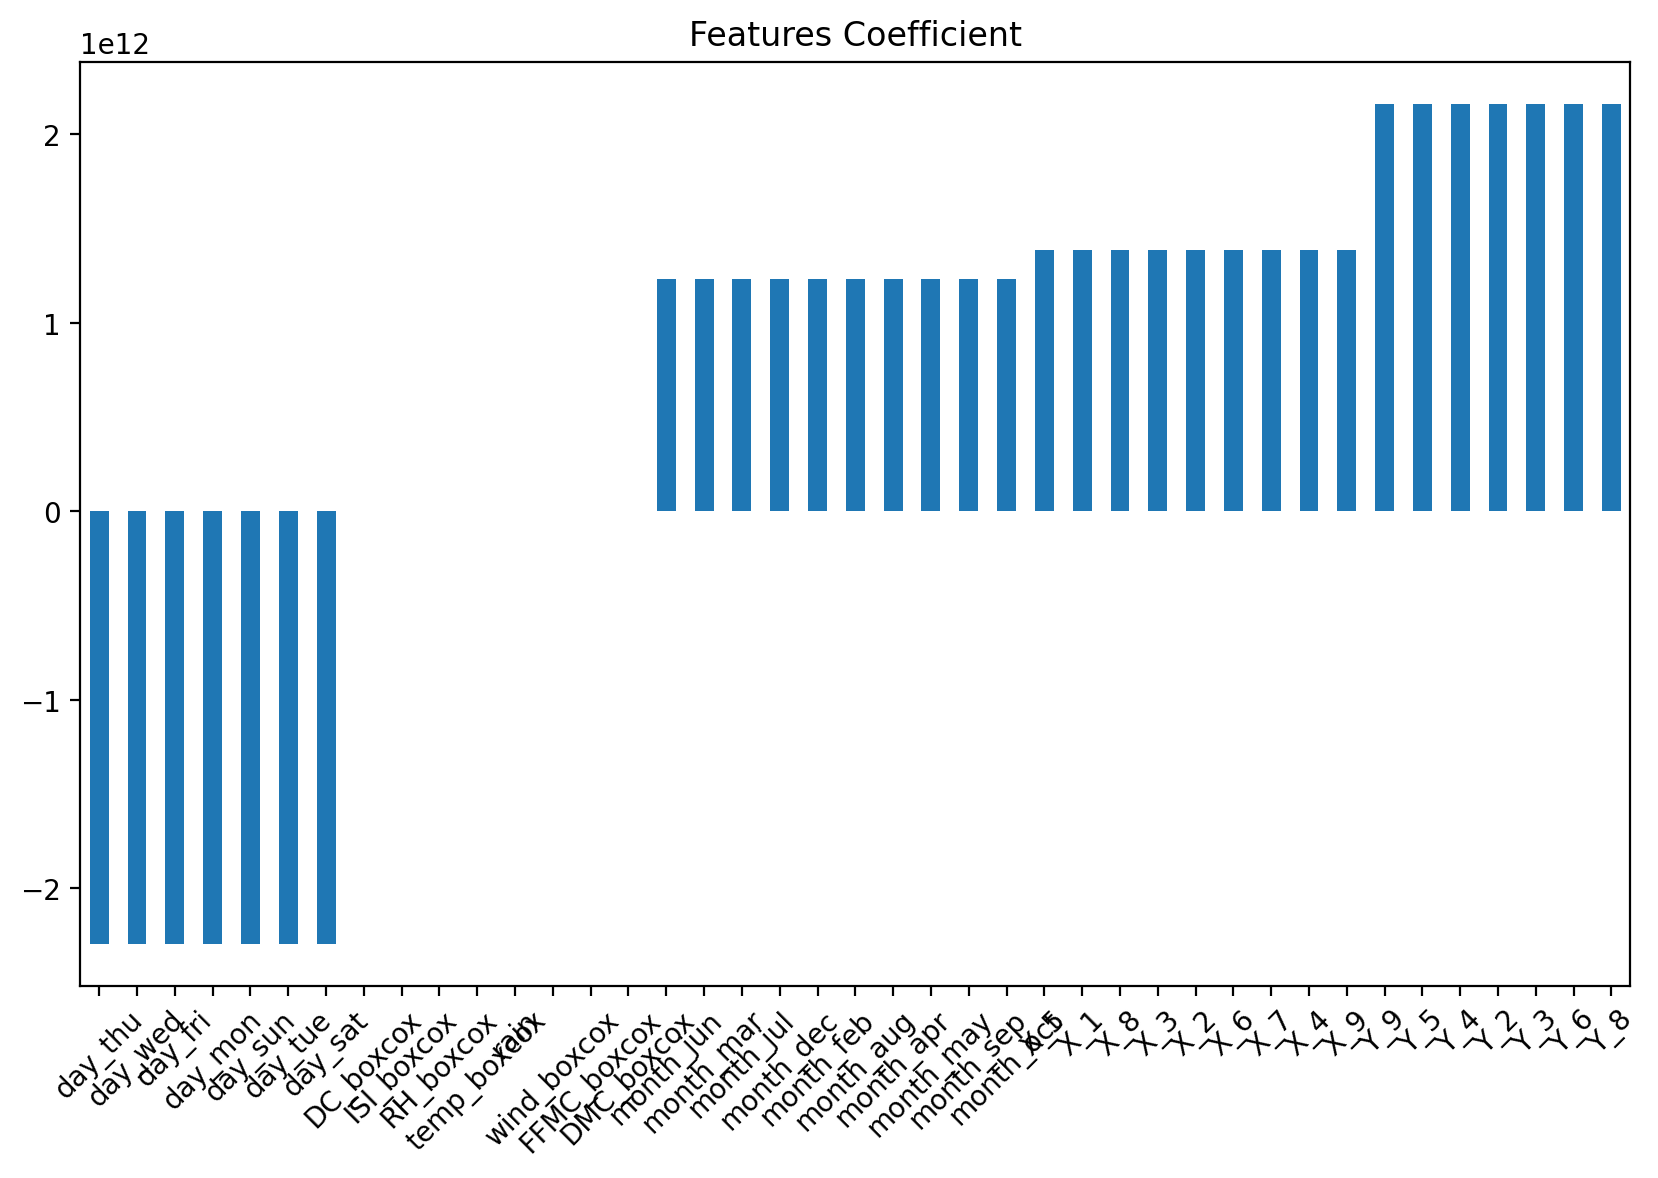

In [85]:
coef = pd.Series(model.coef_, d.columns).sort_values()
fig, ax = plt.subplots(figsize = (10, 6))
coef.plot(kind = 'bar', ax = ax)
plt.title("Features Coefficient")
plt.xticks(rotation = 45) 
plt.show()

#### Inverse Box-Cox

In [64]:
y_pred_inv = []
y_test_inv = []
boxcox_param = -0.06156404347097244

for y in y_pred:
    y_pred_inv.append(inv_boxcox(y, boxcox_param))

for y in y_test.values:
    y_test_inv.append(inv_boxcox(y, boxcox_param))

#### Model Performance

In [65]:
mse = metrics.mean_squared_error(y_true = y_test_inv, y_pred = y_pred_inv)
print(f"mse: {np.round(mse, 2)}")

r2 = metrics.r2_score(y_true = y_test_inv, y_pred = y_pred_inv)
print(f"R2: {np.round(r2, 2)}")

mse: 1195.72
R2: -0.15


Text(0, 0.5, 'True')

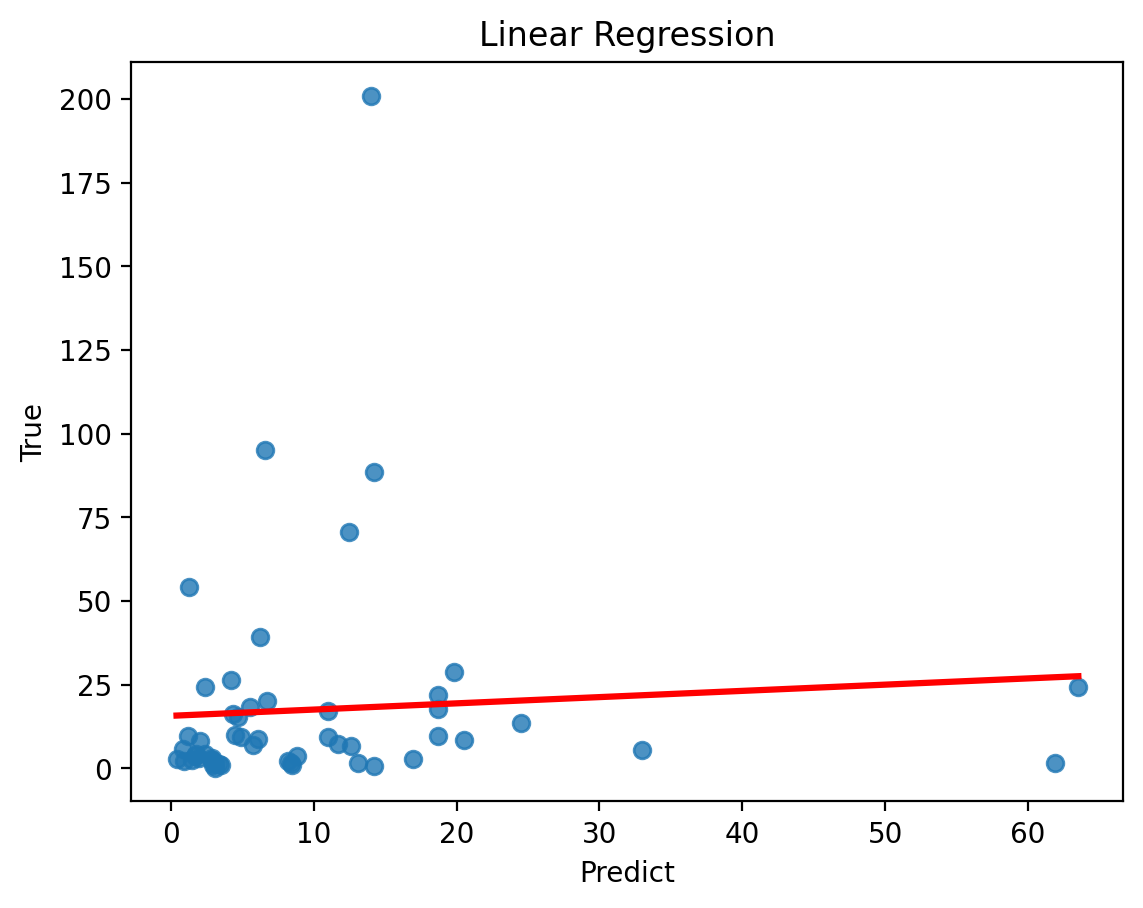

In [66]:
sns.regplot(x = y_pred_inv, y = y_test_inv, ci = False, line_kws = {'color': 'red'})
plt.title("Linear Regression")
plt.xlabel("Predict")
plt.ylabel("True")

### Ridge Regression

In [87]:
model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

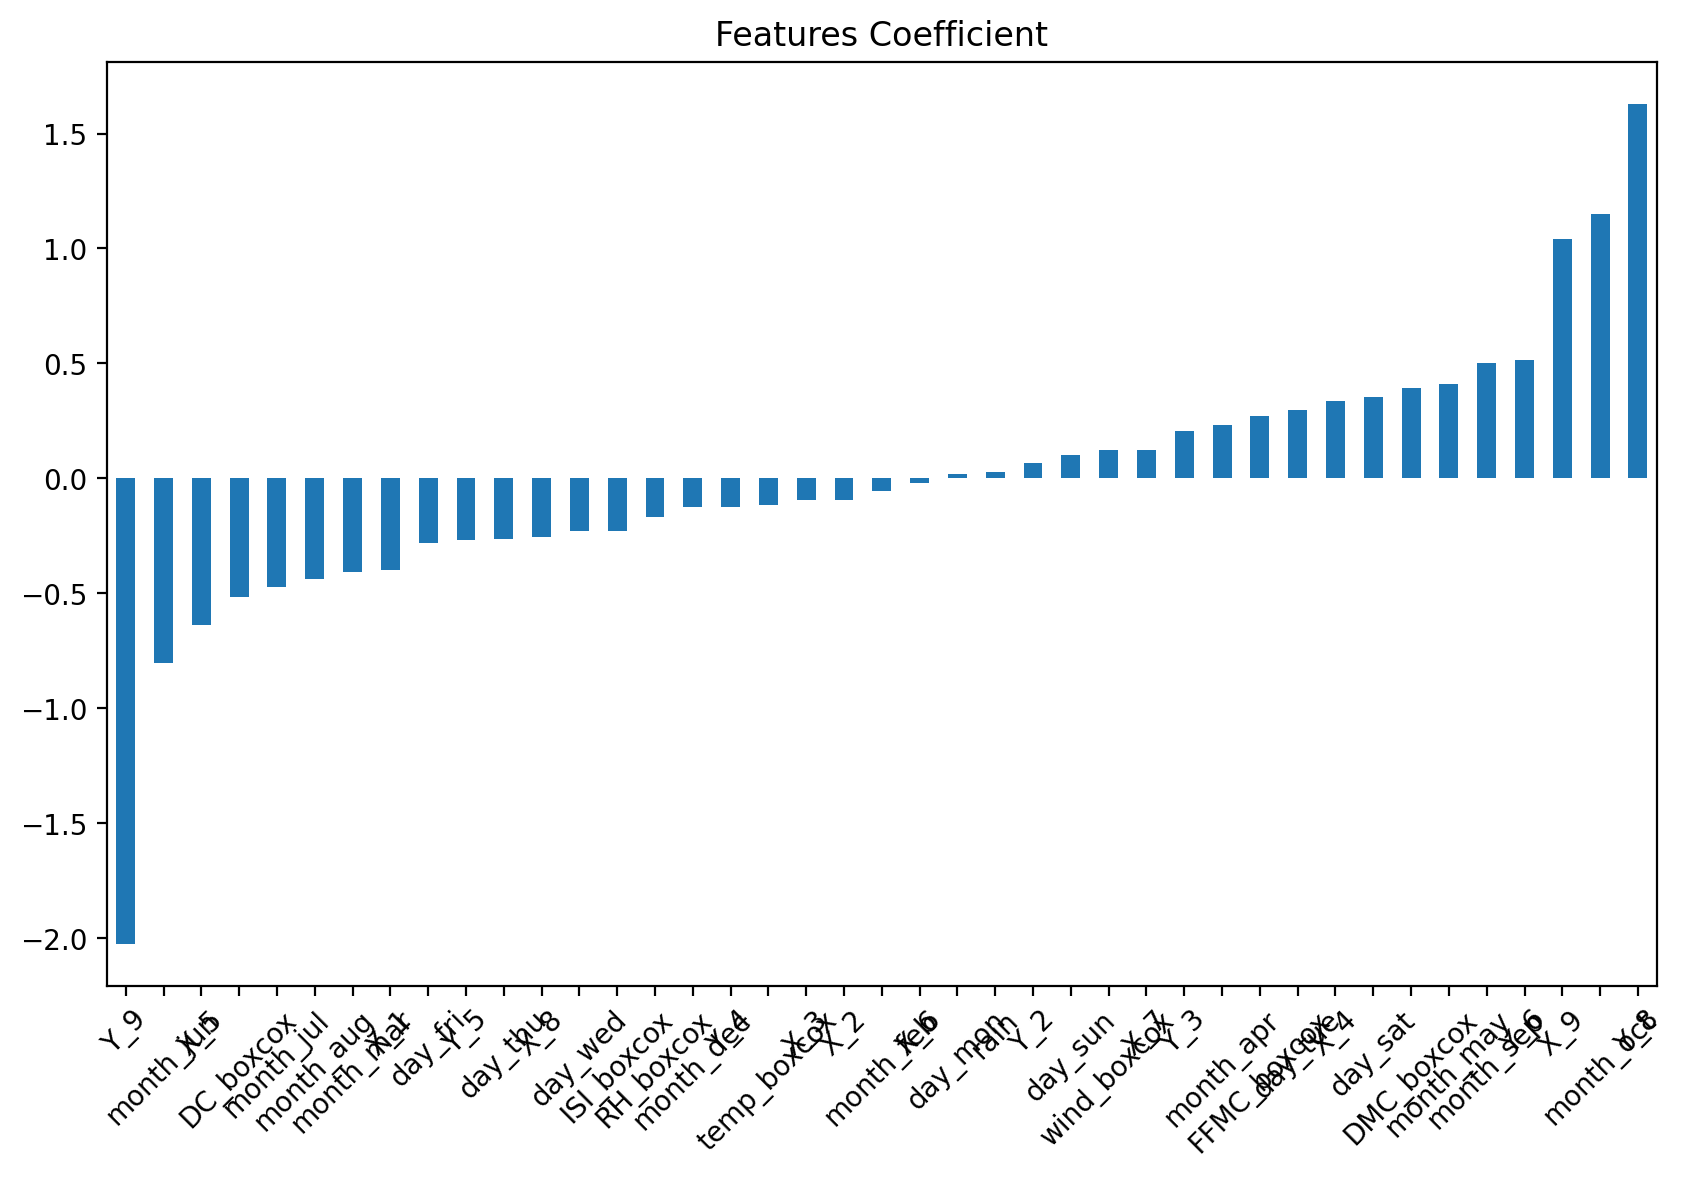

In [88]:
coef = pd.Series(model.coef_, d.columns).sort_values()
fig, ax = plt.subplots(figsize = (10, 6))
coef.plot(kind = 'bar', ax = ax)
plt.title("Features Coefficient")
plt.xticks(rotation = 45) 
plt.show()

#### Inverse Box-Cox

In [89]:
y_pred_inv = []
y_test_inv = []
boxcox_param = -0.06156404347097244

for y in y_pred:
    y_pred_inv.append(inv_boxcox(y, boxcox_param))

for y in y_test.values:
    y_test_inv.append(inv_boxcox(y, boxcox_param))

#### Model Performance

In [90]:
mse = metrics.mean_squared_error(y_true = y_test_inv, y_pred = y_pred_inv)
print(f"mse: {np.round(mse, 2)}")

r2 = metrics.r2_score(y_true = y_test_inv, y_pred = y_pred_inv)
print(f"R2: {np.round(r2, 2)}")

mse: 1101.34
R2: -0.06


Text(0, 0.5, 'True')

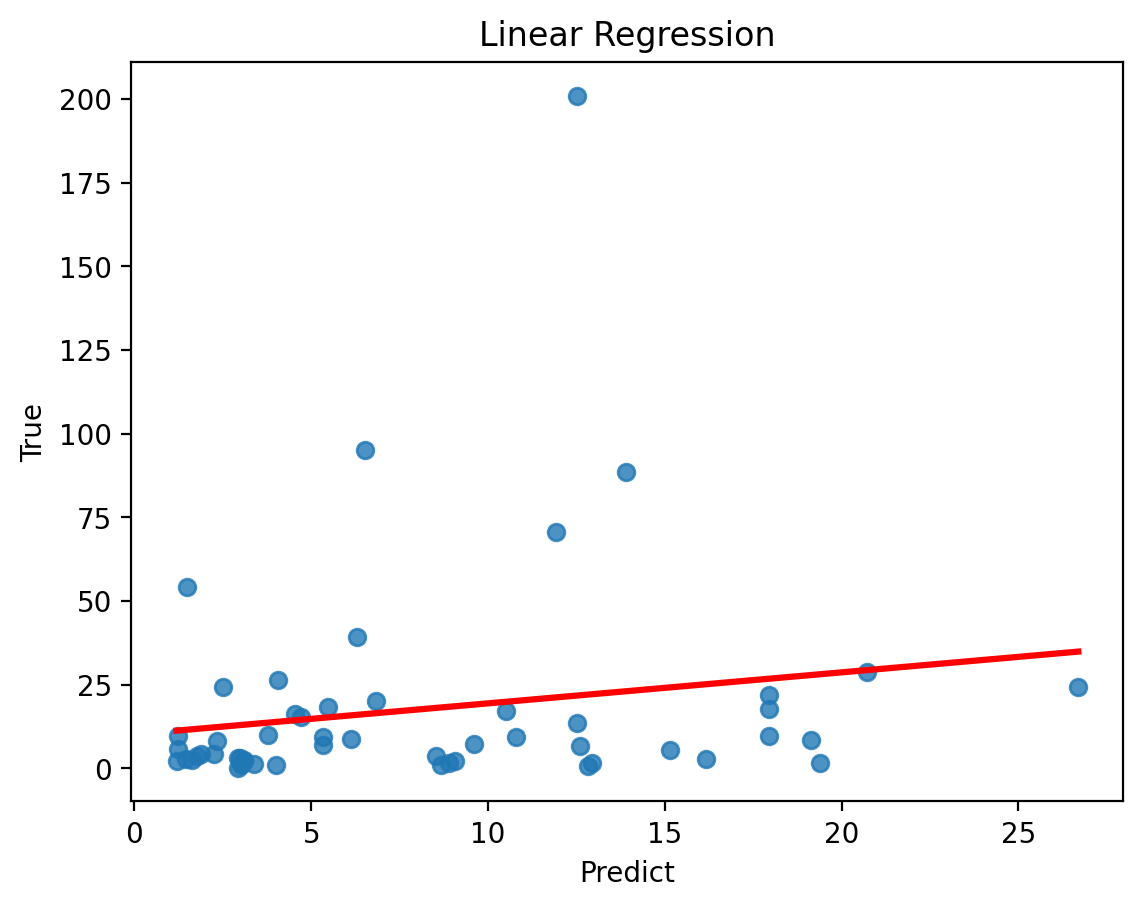

In [91]:
sns.regplot(x = y_pred_inv, y = y_test_inv, ci = False, line_kws = {'color': 'red'})
plt.title("Ridge Regression")
plt.xlabel("Predict")
plt.ylabel("True")

### SVM Regressor

In [81]:
model = svm.SVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [68]:
y_pred_inv = []
y_test_inv = []
boxcox_param = -0.06156404347097244

for y in y_pred:
    y_pred_inv.append(inv_boxcox(y, boxcox_param))

for y in y_test.values:
    y_test_inv.append(inv_boxcox(y, boxcox_param))

In [69]:
mse = metrics.mean_squared_error(y_true = y_test_inv, y_pred = y_pred_inv)
print(f"mse: {np.round(mse, 2)}")

r2 = metrics.r2_score(y_true = y_test_inv, y_pred = y_pred_inv)
print(f"R2: {np.round(r2, 2)}")

mse: 1130.38
R2: -0.08


Text(0, 0.5, 'True')

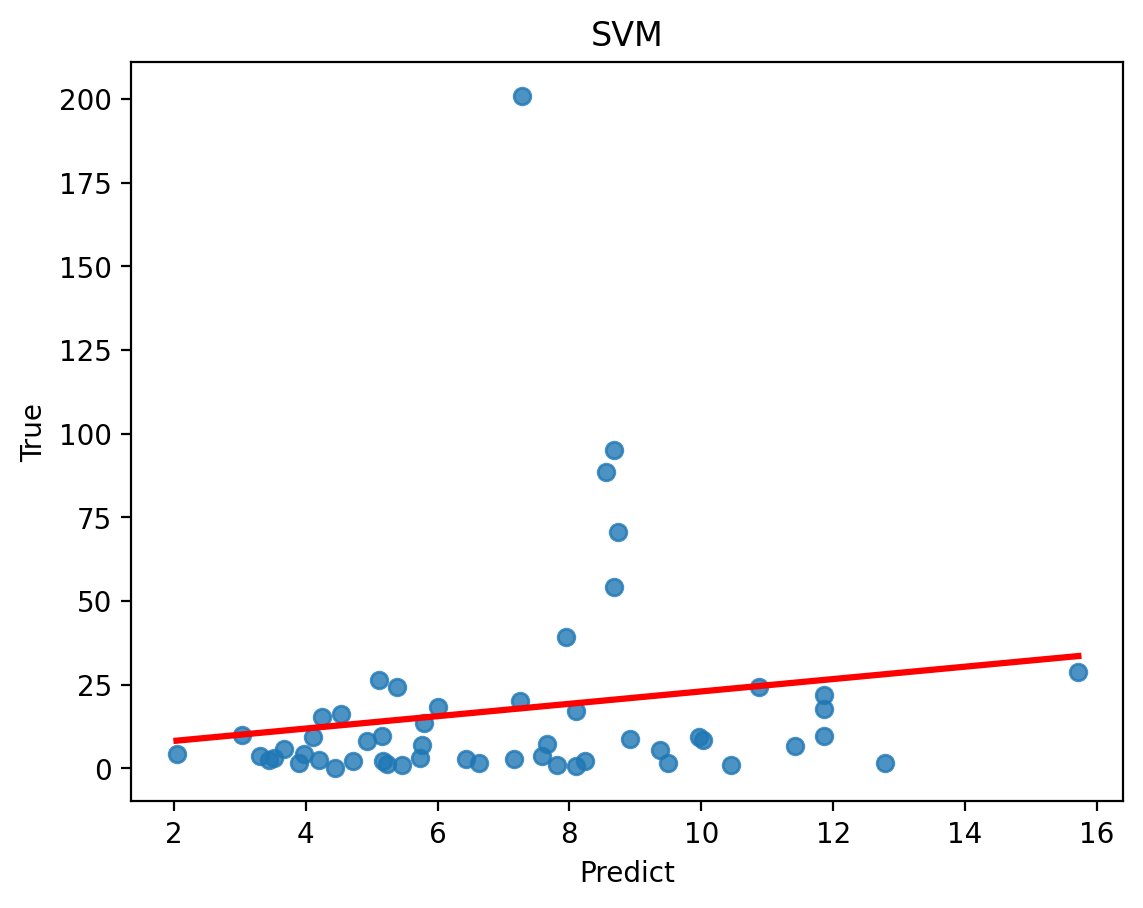

In [70]:
sns.regplot(x = y_pred_inv, y = y_test_inv, ci = False, line_kws = {'color': 'red'})
plt.title("SVM")
plt.xlabel("Predict")
plt.ylabel("True")